# Maschinelles Lernen

## Was ist Maschinelles Lernen?

## Eine Antwort (Arthur Samuel)

Maschinelles Lernen ist ein Feld der Künstlichen Intelligenz. Es wendet statistische Techniken an, um Computern die Fähigkeit zu verleihen, aus Daten zu lernen, ohne explizit programmiert zu sein.

## Andere Antwort (nach Andrew Glassner)

- Techniken, die Information aus Daten extrahieren
- *Daten:* alles was man messen und aufzeichnen kann
- *Information:* was wir interessant finden

<img src="img/ag/Figure-01-001.png">

<img src="img/ag/Figure-01-002.png">

## Andere Antwort (frei nach François Chollet)

- Ein Teilgebiet der künstlichen Intelligenz
- KI: Automatisierung von Aufgaben, die bisher nur Menschen erledigen konnten
  - Das geht auch mit regelbasierten Systemen
  - Beispiel: Schach, Expertensystem
- ML: Der Teil der KI, der versucht Verhalten zu verbessern, wenn mehr Daten zur Verfügung stehen

### Regelbasierte Systeme: Feature Engineering

Extraktion von relevanten Features aus Daten.

<img src="img/ag/Figure-01-003.png" style="width: 40%; margin-left: auto; margin-right: auto;">

<img src="img/ag/Figure-01-004.png" style="width: 20%; margin-left: auto; margin-right: auto;">

## Nochmal François Chollet

- Traditionelles Programmieren:
    - Wir programmieren eine Lösung für ein Problem:
    - Regeln + Daten $\Rightarrow$ Antworten
- ML:
    - Wir extrahieren Regeln aus (gelabelten) Daten
    - Daten + Antworten $\Rightarrow$ Regeln

# Was ist Deep Learning

- Eine Form von ML, die auf künstlichen neuronalen Netzen basiert
- Im Deep Learning erfolgt die Berechnung in "Schichten", die immer algemeinere Features extrahieren
- Deep Learning benötigt weniger Feature Engineering als andere Ansätze
- Braucht aber (meistens) mehr Daten!

## Klassifizierung

<img src="img/ag/Figure-01-022.png" style="float: right;width: 40%;"/>


- Viele Daten, vorgegebene Menge an möglichen Werten
- Weise jedem Datensatz einen oder mehrere Labels zu

In [ ]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

## Clustering

<img src="img/ag/Figure-01-013.jpg" style="float: right;width: 40%;"/>

- Viele Datenpunkte
- Finde heraus, welche "ähnlich" sind

Often mit "unsupervised" Learning


## Regression

<img src="img/ag/Figure-01-011.png" style="float: right;width: 40%;"/>

- Lerne numerische Beziehungen
- Wie hängt das Gehalt von Jahren Berufserfahrung ab?

## Geocoding / Toponym-Auflösung

<img src="img/france.jpg" style="float: right;width: 40%;"/>

<div style="float: left; width: 60%;">

<br/>

- Finde Koordinaten, die zum Vorkommen von Namen in Text gehören
- Inverses Geocoding: Welcher Ortsname gehört zu Koordinaten

</div>

## (Extractive) Question Answering

<img src="img/question-mark.jpg" style="float: right;width: 30%;"/>


- Textdokument, Frage basierend auf dem Dokument
- Extrahiere die Antwort aus dem Dokument

# Vorgehensweise beim Supervised Learning

<img src="img/ag/Figure-01-007.png" style="float: right;width: 40%; padding: 20pt;"/>

- Modell: Algorithmus mitveränderbaren<br/>
  Parametern
- Datenpunkte mit Labels
- Generalisiere die Information<br/>
  in den gelabelten Daten
- Verbessere die Performance des<br/>
  Systems durch "Tunen" der Parameter

### Einfaches Beispiel: Lineare Regression

- Ein einziges numerisches Feature
- Ein numerisches Label
- Wir versuchen eine lineare Funktion der Form $y = w x + b$ zu finden, die "möglichst gut passt"

#### Daten

- Wir erzeugen uns für dieses Beispiel synthetische Daten:

In [ ]:
import torch
num_samples = 80

plt.scatter(range(num_samples), torch.rand(num_samples), color='orange')
plt.scatter(range(num_samples), torch.randn(num_samples), color='blue');

In [ ]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.hist(torch.rand(100 * num_samples).numpy(), bins=num_samples, color='orange')
plt.subplot(1, 2, 2)
plt.hist(torch.randn(100 * num_samples).numpy(), bins=num_samples, color='blue');

In [ ]:

x = torch.rand(num_samples) * 10
y = 5 * x - 10 + 5 * torch.randn(num_samples)
x[:5], y[:5]

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.scatter(x, y);

### Realistischer

<img src="img/ag/Figure-01-007.png" style="width: 70%; margin-left: auto; margin-right: auto;"/>

### Anpassen eines Linearen Modells

In [ ]:
def model(x, w, b):
    return w * x + b

### Bestimmen der Qualität: Loss

- Verschiedene Varianten: 
- RMSE
- MSE 
- MAE

In [ ]:
def loss_fn(y_pred, y_true):
    squared_diffs = (y_pred - y_true) ** 2
    return squared_diffs.mean()

## Evaluierung/Test

<img src="img/ag/Figure-01-009.png" style="width: 70%; margin-left: auto; margin-right: auto;"/>

### Evaluieren des Modells:
(Hinweis: Broadcasting)

In [ ]:
w = torch.tensor(1.0)
b = torch.tensor(0.0)
w, b

In [ ]:
y_pred = model(x, w, b)
y_true = y
y_pred[:5], y_true[:5]

In [ ]:
loss = loss_fn(y_pred, y_true)
loss.item()

## Training

<br/>
<img src="img/ag/Figure-01-008.png" style="width: 100%;"/>

## Wie updaten wir die Parameter?

<img src="img/ag/Figure-05-006.png" style="width: 50%; margin-left: auto; margin-right: auto; 0"/>

## Wie updaten wir die Parameter?

<img src="img/ag/Figure-05-007.png" style="width: 50%; margin-left: auto; margin-right: auto; 0"/>

In [ ]:
def update_parameter(p, rate_of_change, learning_rate = 1e-2):
    p -= learning_rate * rate_of_change

### Mathematisch
$$\nabla_{w, b} L = \Bigl(\frac{\partial L}{\partial w}, \frac{\partial L}{\partial b} \Bigr)
= \Bigl(\frac{\partial L}{\partial m}\cdot\frac{\partial m}{\partial w},
\frac{\partial L}{\partial m} \cdot \frac{\partial m}{\partial b} \Bigr)$$

In [ ]:
def model(x, w, b):
    return w * x + b

In [ ]:
def dmodel_dw(x, w, b):
    return x
def dmodel_db(x, w, b):
    return 1.0

$$\nabla_{w, b} L 
= \Bigl(\frac{\partial L}{\partial m}\cdot\frac{\partial m}{\partial w},
\frac{\partial L}{\partial m} \cdot \frac{\partial m}{\partial b} \Bigr)$$

In [ ]:
def gradient_fn(x, y_pred, y_true, w, b):
    dloss_dm = 2 * (y_pred - y_true) / y_pred.size(0)
    dm_dw = dloss_dm * dmodel_dw(x, w, b)
    dm_db = dloss_dm * dmodel_db(x, w, b)
    return torch.stack([dm_dw.sum(), dm_db.sum()])

## Training

<br/>
<img src="img/ag/Figure-01-008.png" style="width: 100%;"/>

### Die Training-Loop

In [ ]:
def training_loop(n_epochs, learning_rate, params, x, y_true):
    for epoch in range(1, n_epochs + 1):
        w, b = params
        # _.forward()
        y_pred = model(x, w, b)
        loss = loss_fn(y_pred, y_true)
        gradient = gradient_fn(x, y_pred, y_true, w, b)
        # _.backward()
        params = params - learning_rate * gradient
        if epoch < 5 or epoch % (n_epochs // 10) == 0:
            print(f"Epoch {epoch:4}: loss = {loss.item():8.3f} "
                  f"(w = {w.item():6.3f}, b = {b.item():6.3f}, "
                  f"gradient = ({gradient[0]:.3f}, {gradient[1]:.3f})")
    return params

In [ ]:
training_loop(
    n_epochs=100,
    learning_rate=0.1,
    params=torch.tensor([1.0, 0.0]),
    x=x,
    y_true=y
)

## Wie viel updaten wir die Parameter?

<img src="img/ag/Figure-19-013.png" style="width: 80%; margin-left: auto; margin-right: auto; 0"/>

## Wie viel updaten wir die Parameter?

<img src="img/ag/Figure-19-014.png" style="width: 80%; margin-left: auto; margin-right: auto; 0"/>


## Wie viel updaten wir die Parameter?

<img src="img/ag/Figure-19-015.png" style="width: 80%; margin-left: auto; margin-right: auto; 0"/>


## Wie viel updaten wir die Parameter?

<img src="img/ag/Figure-19-016.png" style="width: 80%; margin-left: auto; margin-right: auto; 0"/>

In [ ]:
training_loop(
    n_epochs=100,
    learning_rate=0.01,
    params=torch.tensor([1.0, 0.0]),
    x=x,
    y_true=y
)

In [ ]:
params = training_loop(
    n_epochs=1000,
    learning_rate=1e-2,
    params=torch.tensor([1.0, 0.0]),
    x=x,
    y_true=y
)

In [ ]:
y_pred = model(x, *params)
plt.figure(figsize=(12, 5))
plt.scatter(x, y)
plt.scatter(x, y_pred);

# Mini Workshop

- Notebook 010x Workshop Einführung
- Abschnitt "Lineare Regression"

*Hinweis:* Bitte versuchen Sie die Lösung so weit wie möglich ohne Bezugnahme auf dieses Notebook zu lösen.

### Normalisieren der Inputs


In [ ]:
x_mean = x.mean()
x_std = x.std()
y_mean = y.mean()
y_std = y.std()
x_mean, x_std, y_mean, y_std

In [ ]:
x_norm = (x - x_mean) / x_std
y_norm = (y - y_mean) / y_std
y_norm[:5], y_norm.mean(), y_norm.std()

In [ ]:
params = training_loop(
    n_epochs=1000,
    learning_rate=1e-2,
    params=torch.tensor([1.0, 0.0]),
    x=x_norm,
    y_true=y_norm
)

In [ ]:
y_pred = model(x_norm, *params) * y_std + y_mean
plt.figure(figsize=(12, 5))
plt.scatter(x, y)
plt.scatter(x_norm * x_std + x_mean, y_pred);

# Mini Workshop

- Notebook 010x Workshop Einführung
- Abschnitt "Normierte Parameter"

# Autograd

Das Berechnen der Gradienten ist mühsam und fehleranfällig.

PyTorch kann das für uns übernehmen.

In [ ]:
def model(x, w, b):
    return w * x + b

def loss_fn(y_pred, y_true):
    squared_diffs = (y_pred - y_true) ** 2
    return squared_diffs.mean()

In [ ]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

In [ ]:
params.grad

In [ ]:
loss = loss_fn(model(x, *params), y)
loss.backward()

params.grad

Was passiert, wenn wir die Loss-Funktion mehrmals auswerten?

In [ ]:
loss = loss_fn(model(x, *params), y)
loss.backward()

params.grad

In [ ]:
if params.grad is not None:
    params.grad.zero_()

In [ ]:
params.grad

In [ ]:
def training_loop(n_epochs, learning_rate, params, x, y_true):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:
            params.grad.zero_()
            
        # model.forward()
        y_pred = model(x, *params)
        loss = loss_fn(y_pred, y_true)
        loss.backward()
        
        with torch.no_grad():
            params -= learning_rate * params.grad
            if epoch < 5 or epoch % (n_epochs // 10) == 0:
                print(f"Epoch {epoch:4}: loss = {loss.item():8.3f} "
                      f"(w = {params[0].item():6.3f}, b = {params[1].item():6.3f}, "
                      f"gradient = ({params.grad[0]:.3f}, {params.grad[1]:.3f})")

In [ ]:
training_loop(
    n_epochs=1000,
    learning_rate=1e-2,
    params=torch.tensor([1.0, 0.0], requires_grad=True),
    x=x,
    y_true=y
)

# Mini Workshop

- Notebook 010x Workshop Einführung
- Abschnitt "Autograd"

# Optimierer

- Pytorch hat mehrere Optimierungsstrategien
- Diese arbeiten auf Batches

In [ ]:
import torch.optim as optim
[name for name in dir(optim) if name[0] != '_']

In [ ]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 0.01
optimizer = optim.SGD([params], lr=learning_rate)
optimizer

In [ ]:
y_pred = model(x, *params)
loss = loss_fn(y_pred, y_true)
loss.backward()
optimizer.step()
params

In [ ]:
y_pred = model(x, *params)
loss = loss_fn(y_pred, y_true)
optimizer.zero_grad()
loss.backward()
optimizer.step()
params

In [ ]:
def training_loop(n_epochs, optimizer, params, x, y_true):
    for epoch in range(1, n_epochs + 1):
        # model.forward()
        y_pred = model(x, *params)
        loss = loss_fn(y_pred, y_true)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch < 5 or epoch % (n_epochs // 10) == 0:
            print(f"Epoch {epoch:4}: loss = v{loss.item():8.3f} "
                  f"(w = {params[0].item():6.3f}, b = {params[1].item():6.3f}, "
                  f"gradient = ({params.grad[0]:.3f}, {params.grad[1]:.3f})")

In [ ]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 0.01
optimizer = optim.SGD([params], lr=learning_rate)
training_loop(
    n_epochs=1000,
    optimizer=optimizer,
    params=params,
    x=x,
    y_true=y
)

In [ ]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1
optimizer = optim.Adam([params], lr=learning_rate)
training_loop(
    n_epochs=1000,
    optimizer=optimizer,
    params=params,
    x=x,
    y_true=y
)

# Randomisierung, Test/Validation/Train Split

In [ ]:
import math
n_samples = x.shape[0]
n_validation = math.floor(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)
shuffled_indices[:5]

In [ ]:
train_indices = shuffled_indices[:-n_validation]
validation_indices = shuffled_indices[-n_validation:]
train_indices[:5], validation_indices[:5]

In [ ]:
train_x = x[train_indices]
train_y = y[train_indices]
validation_x = x[validation_indices]
validation_y = y[validation_indices]

In [ ]:
def training_loop(n_epochs, optimizer, params, x_train, y_train, x_val, y_val):
    for epoch in range(1, n_epochs + 1):
        y_train_pred = model(x_train, *params)
        loss_train = loss_fn(y_train_pred, y_train)

        y_val_pred = model(x_val, *params)
        loss_val = loss_fn(y_val_pred, y_val)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
        if epoch < 5 or epoch % (n_epochs // 10) == 0:
            print(f"Epoch {epoch:4}: training loss = {loss_train.item():8.3f}, "
                  f"validation loss = {loss_val.item():8.3f}")

In [ ]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 0.01
optimizer = optim.SGD([params], lr=learning_rate)
training_loop(
    n_epochs=1000,
    optimizer=optimizer,
    params=params,
    x_train=train_x,
    y_train=train_y,
    x_val=validation_x,
    y_val=validation_y
)

# Mini Workshop

- Notebook 010x Workshop Einführung
- Abschnitt "Autograd"

# Mini Workshop

- Notebook 010x Workshop Einführung
- Abschnitt "Optimierer, Randomisierung"

# Pytorch Module und Batches

In [361]:
import torch.nn as nn
linear_model = nn.Linear(1, 1, bias=True)
linear_model(torch.tensor([1.0]))

tensor([-0.2154], grad_fn=<AddBackward0>)

In [372]:
# Fehler
# linear_model(x)

In [373]:
x.shape, x.unsqueeze(-1).shape

(torch.Size([80]), torch.Size([80, 1]))

In [367]:
linear_model(x.unsqueeze(-1))[:5]

tensor([[-0.4597],
        [-1.1095],
        [-0.7781],
        [-1.9956],
        [-1.3580]], grad_fn=<SliceBackward>)

*Hinweis:* Bei Modulen definiert man `forward()`, ruft sie aber als Funktion auf.

In [369]:
linear_model.weight

Parameter containing:
tensor([[-0.3204]], requires_grad=True)

In [371]:
linear_model.bias

Parameter containing:
tensor([0.1049], requires_grad=True)

In [375]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(
    linear_model.parameters(),
    lr=0.01
)

In [377]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[0.0170]], requires_grad=True),
 Parameter containing:
 tensor([-0.8880], requires_grad=True)]

In [386]:
def training_loop(n_epochs, optimizer, model, loss_fn, x_train, y_train, x_val, y_val):
    for epoch in range(1, n_epochs + 1):
        y_train_pred = model(x_train)
        loss_train = loss_fn(y_train_pred, y_train)

        y_val_pred = model(x_val)
        loss_val = loss_fn(y_val_pred, y_val)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
        if epoch < 5 or epoch % (n_epochs // 10) == 0:
            print(f"Epoch {epoch:4}: training loss = {loss_train.item():8.3f}, "
                  f"validation loss = {loss_val.item():8.3f}")

In [387]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(
    linear_model.parameters(),
    lr=0.01
)

In [390]:
training_loop(
    n_epochs=1000,
    optimizer=optimizer,
    model=linear_model,
    loss_fn=nn.MSELoss(),
    x_train=train_x.unsqueeze(-1),
    y_train=train_y.unsqueeze(-1),
    x_val=validation_x.unsqueeze(-1),
    y_val=validation_y.unsqueeze(-1)
)

Epoch    1: training loss =  201.387, validation loss =  233.990
Epoch    2: training loss =  165.857, validation loss =  180.922
Epoch    3: training loss =  160.941, validation loss =  171.612
Epoch    4: training loss =  159.344, validation loss =  168.740
Epoch  100: training loss =   82.109, validation loss =   91.922
Epoch  200: training loss =   48.019, validation loss =   57.330
Epoch  300: training loss =   33.851, validation loss =   42.326
Epoch  400: training loss =   27.964, validation loss =   35.686
Epoch  500: training loss =   25.517, validation loss =   32.666
Epoch  600: training loss =   24.500, validation loss =   31.242
Epoch  700: training loss =   24.077, validation loss =   30.542
Epoch  800: training loss =   23.902, validation loss =   30.182
Epoch  900: training loss =   23.829, validation loss =   29.987
Epoch 1000: training loss =   23.799, validation loss =   29.877


# Allgemeinerer Algorithmus?

- Neurale Netze

<img src="img/ag/Figure-01-021.png" style="float: center; width: 30%; margin-left: auto; margin-right: auto;"/>

## Neuronen

<img src="img/ag/Figure-10-001.png" style="width: 80%; margin-left: auto; margin-right: auto;"/>

## Künstliche Neuronen

<img src="img/ag/Figure-10-006.png" style="width: 60%; margin-left: auto; margin-right: auto;"/>

## Künstliche Neuronen

<img src="img/ag/Figure-10-004.png" style="width: 30%; margin-left: auto; margin-right: auto;"/>

## Neuronale Netze

<img src="img/ag/Figure-18-032.png" style="width: 70%; margin-left: auto; margin-right: auto;"/>

## Aktivierungsfunktionen

In [344]:
import torch.nn as nn
import numpy as np
act_x = torch.tensor(np.linspace(-6, 6, 100))

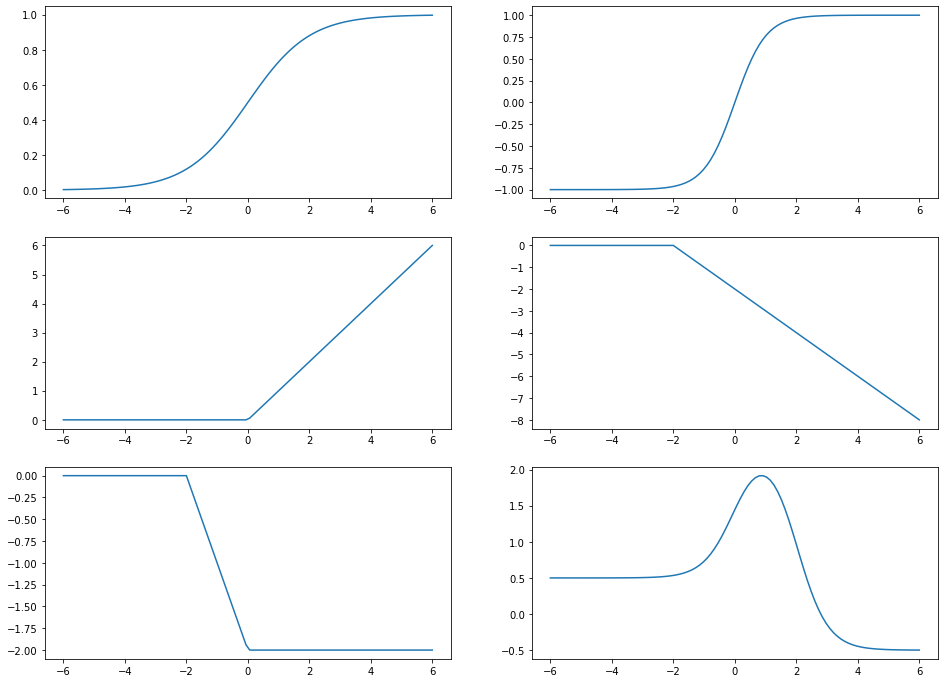

In [356]:
plt.figure(figsize=(16, 12))
plt.subplot(3, 2, 1)
plt.plot(act_x, nn.Sigmoid()(act_x))
plt.subplot(3, 2, 2)
plt.plot(act_x, nn.Tanh()(act_x))
plt.subplot(3, 2, 3)
plt.plot(act_x, nn.ReLU()(act_x))
plt.subplot(3, 2, 4)
plt.plot(act_x, - nn.ReLU()(act_x + 2))
plt.subplot(3, 2, 5)
plt.plot(act_x, nn.ReLU()(act_x) - nn.ReLU()(act_x + 2))
plt.subplot(3, 2, 6)
plt.plot(act_x, nn.Tanh()(act_x) - 1.5 * nn.Tanh()(act_x - 2))

## Erinnerung: Training

<br/>
<img src="img/ag/Figure-01-008.png" style="width: 100%;"/>

## Training Neuraler Netze

<img src="img/ag/Figure-18-033.png" style="width: 100%; margin-left: auto; margin-right: auto;"/>


## Training Neuraler Netze

<img src="img/ag/Figure-18-034.png" style="width: 40%; margin-left: auto; margin-right: auto;"/>

## Training Neuraler Netze

<img src="img/ag/Figure-18-035.png" style="width: 100%; margin-left: auto; margin-right: auto; 0"/>

## Training Neuraler Netze

<img src="img/ag/Figure-18-036.png" style="width: 50%; margin-left: auto; margin-right: auto;"/>

## Training Neuraler Netze

<img src="img/ag/Figure-18-037.png" style="width: 100%; margin-left: auto; margin-right: auto; 0"/>

## Wie updaten wir die Parameter?

<img src="img/ag/Figure-05-001.png" style="float: left; width: 45%; margin-left: auto; margin-right: auto; 0"/>
<img src="img/ag/Figure-05-005.png" style="float: right; width: 45%; margin-left: auto; margin-right: auto; 0"/>

## Wie updaten wir die Parameter?

<img src="img/ag/Figure-05-012.png" style="width: 35%; margin-left: auto; margin-right: auto; 0"/>

## Wie updaten wir die Parameter?

<img src="img/ag/Figure-05-013.png" style="width: 60%; margin-left: auto; margin-right: auto; 0"/>

## Modelle

<img src="img/ag/Figure-11-001.png" style="width: 100%;"/>

## Für Neuronale Netze:

Was repräsentiert werden kann hängt ab von

- Anzahl der Layers
- Anzahl der Neutronen per Layer
- Komplexität der Verbindungen zwischen Neutronen

### Was kann man (theoretisch) lernen?

Schwierig aber irrelevant

### Was kann man praktisch lernen?

Sehr viel, wenn man genug Zeit und Daten hat

### Was kann man effizient lernen?

Sehr viel, wenn man sich geschickt anstellt
(und ein Problem hat, an dem viele andere Leute arbeiten)

# Bias/Variance Tradeoff

- Modelle mit geringer Expressivität (representational power)
  - Können schnell trainiert werden
  - Arbeiten mit wenig Trainingsdaten
  - Sind robust gegenüber Fehlern in den Trainingsdaten

- Wir sind nicht an einer möglichst exakten Wiedergabe unserer Daten interessiert

- Entscheidend ist wie gut unser Modell auf unbekannte Daten generalisiert

<img src="img/ag/Figure-09-002.png" style="width: 60%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-09-004.png" style="width: 60%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-09-003.png" style="width: 60%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-09-005.png" style="width: 60%; margin-left: auto; margin-right: auto;"/>


### Generalisierung und Rauschen
<img src="img/ag/Figure-09-008.png" style="width: 40%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-09-009.png" style="width: 80%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-09-010.png" style="width: 40%; margin-left: auto; margin-right: auto;"/>

## Komplexität der Entscheidungsgrenze

<img src="img/ag/Figure-09-006.png" style="width: 100%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-09-001.png" style="width: 50%; margin-left: auto; margin-right: auto;"/>

## Datenverteilung und Qualität


### Erinnerung: die Trainings-Schleife

<img src="img/ag/Figure-08-001.png" style="width: 20%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-08-001.png" style="width: 60%; margin-left: auto; margin-right: auto;"/>

## Was lernt ein Klassifizierer?

<img src="img/ag/Figure-08-002.png" style="width: 60%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-08-003.png" style="width: 100%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-08-004.png" style="width: 70%; margin-left: auto; margin-right: auto;"/>

# Wie gut sind wir?

Wie wissen wir, wie gut unser Modell wirklich ist?

## Was kann schief gehen?

<img src="img/ag/Figure-03-015.png" style="width: 100%; margin-left: auto; margin-right: auto; 0"/>

## Was kann schief gehen?

<img src="img/ag/Figure-03-017.png" style="width: 100%; margin-left: auto; margin-right: auto; 0"/>

## Was kann schief gehen?

<img src="img/ag/Figure-03-018.png" style="width: 80%; margin-left: auto; margin-right: auto; 0"/>

## Accuracy: Wie viel haben wir richtig gemacht?


<img src="img/ag/Figure-03-023.png" style="width: 60%; margin-left: auto; margin-right: auto; 0"/>

## Precision: Wie gut sind unsere positiven Elemente?


<img src="img/ag/Figure-03-024.png" style="width: 60%; margin-left: auto; margin-right: auto; 0"/>

## Recall: Wie viele positive Elemente haben wir übersehen?


<img src="img/ag/Figure-03-026.png" style="width: 60%; margin-left: auto; margin-right: auto; 0"/>

# Beispiel: MNIST Data

<img src="img/ag/Figure-01-023.png" style="float: right;width: 40%;"/>

Wir trainieren ein Modell um handgeschriebene Ziffern zu erkennen:

#### Importieren der Abhängigkeiten

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import torch
import torchvision
from torch import nn
import os
import shutil

#### Laden der Daten

In [ ]:
mnist = torchvision.datasets.MNIST('./data', download=True)
mnist

### Plotten der Daten

In [ ]:
def plot_random_datapoint():
    sample = np.random.randint(0, X_train_in.shape[0])

    plt.figure(figsize = (10,10))
    mnist_img = X_train_in[sample]
    plt.imshow(mnist_img, cmap="Greys")

    # Get the `Axes` instance on the current figure
    ax = plt.gca()

    plt.tick_params(
        axis='both', which='major', bottom=True, left=True,
        labelbottom=False, labelleft=False)

    plt.tick_params(
        axis='both', which='minor', bottom=False, left=False,
        labelbottom=True, labelleft=True)

    ax.set_xticks(np.arange(-.5, 28, 1))
    ax.set_yticks(np.arange(-.5, 28, 1))

    ax.set_xticks(np.arange(0, 28, 1), minor=True);
    ax.set_xticklabels([str(i) for i in np.arange(0, 28, 1)], minor=True);
    ax.set_yticks(np.arange(0, 28, 1), minor=True);
    ax.set_yticklabels([str(i) for i in np.arange(0, 28, 1)], minor=True);

    ax.grid(color='black', linestyle='-', linewidth=1.5)
    plt.colorbar(fraction=0.046, pad=0.04, ticks=[0,32,64,96,128,160,192,224,255])

In [ ]:
plot_random_datapoint()

#### Preprocessing der Daten

In [ ]:
def preprocess_data(data):
    reshaped_data = data.reshape(-1, 28, 28, 1)
    float_data = reshaped_data.astype('float32')
    return float_data / 255.0

In [ ]:
X_train = preprocess_data(X_train_in)
X_test = preprocess_data(X_test_in)

In [ ]:
X_train.shape, X_test.shape


In [ ]:
min(y_train_in), max(y_train_in)

In [ ]:
n_classes = max(y_train_in) + 1
y_train = to_categorical(y_train_in, n_classes)
y_test = to_categorical(y_test_in, n_classes)

In [ ]:
y_train_in[0], y_test_in[0]

In [ ]:
y_train[0], y_test[0]

Reduziere die Größe der Trainingsdaten um den Effekt von zu wenigen Daten zu illustrieren:

In [ ]:
X_train_medium = X_train[:6000, :]
y_train_medium = y_train[:6000]
X_train_small = X_train[:600, :]
y_train_small = y_train[:600]
X_train_tiny = X_train[:120, :]
y_train_tiny = y_train[:120]
print(f"X_train has        {X_train.shape[0]:6} samples.")
print(f"X_train_medium has {X_train_medium.shape[0]:6} samples.")
print(f"X_train_small has  {X_train_small.shape[0]:6} samples.")
print(f"X_train_tiny has   {X_train_tiny.shape[0]:6} samples.")

In [ ]:
def create_model():
    model = Sequential([
        Input(shape=(28, 28, 1)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(n_classes, activation='softmax')
        ])
    return model

### Instanziieren der Modelle

Wir instanziieren ein Modell für jeden Trainingsdatensatz um verfolgen zu
können, wie gut die Modelle lernen.

In [ ]:
model_tiny = create_model()
model_small = create_model()
model_medium = create_model()
model_large = create_model()

In [ ]:
model_large.summary()

In [ ]:
784 * 128 + 128

#### Kompilieren der Modelle

In [ ]:
model_tiny.compile(loss='categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy',
                            Precision(class_id=0, name='precision'),
                            Recall(class_id=0, name='recall')])
model_small.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy',
                             Precision(class_id=0, name='precision'),
                             Recall(class_id=0, name='recall')])
model_medium.compile(loss='categorical_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy',
                              Precision(class_id=0, name='precision'),
                              Recall(class_id=0, name='recall')])
model_large.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy',
                             Precision(class_id=0, name='precision'),
                             Recall(class_id=0, name='recall')])

#### Löschen des TensorBoard Verzeichnisses

In [ ]:
shutil.rmtree('logs', True)
os.mkdir('logs')

#### Trainieren!

In [ ]:
def train_model(model, X_train, y_train, tensor_board_suffix, epochs=40):
    tensorboard = TensorBoard(f'logs/deep-net-{tensor_board_suffix}')
    model.fit(X_train, y_train,
              batch_size=min(X_train.shape[0]//2, 100),
              epochs=epochs, verbose=1,
              validation_data=(X_test, y_test),
              callbacks=[tensorboard])

In [ ]:
train_model(model_tiny, X_train_tiny, y_train_tiny, 'tiny')

In [ ]:
train_model(model_small, X_train_small, y_train_small, 'small')

In [ ]:
train_model(model_medium, X_train_medium, y_train_medium, 'medium')

In [ ]:
train_model(model_large, X_train, y_train, 'large')

In [ ]:
model_large.save('large-model.h5')

In [ ]:
import tensorflow as tf
loaded_model = tf.keras.models.load_model('large-model.h5')

In [ ]:
loaded_model.summary()

In [ ]:
X_test.shape, X_test[0:1].shape

In [ ]:
prediction = loaded_model.predict(X_test[0:1])

In [ ]:
np.argmax(prediction), y_test_in[0]

# Laden eines Bildes

In [ ]:
from PIL import Image

In [ ]:
my8 = Image.open('number8.png')

In [ ]:
my8

In [ ]:
my8_gray = my8.convert('L')

In [ ]:
my_8_array = 255 - np.array(my8_gray)

In [ ]:
my_8_array.shape

In [ ]:
my_8_input = my_8_array.reshape((1, 28, 28, 1)).astype('float32') / 255

In [ ]:
my_8_prediction = loaded_model.predict(my_8_input)
np.argmax(my_8_prediction), np.min(my_8_input), np.max(my_8_input)

In [ ]:
def plot_datapoint(mnist_img):

    plt.figure(figsize = (10,10))
    plt.imshow(mnist_img, cmap="Greys")

    # Get the `Axes` instance on the current figure
    ax = plt.gca()

    plt.tick_params(
        axis='both', which='major', bottom=True, left=True,
        labelbottom=False, labelleft=False)

    plt.tick_params(
        axis='both', which='minor', bottom=False, left=False,
        labelbottom=True, labelleft=True)

    ax.set_xticks(np.arange(-.5, 28, 1))
    ax.set_yticks(np.arange(-.5, 28, 1))

    ax.set_xticks(np.arange(0, 28, 1), minor=True);
    ax.set_xticklabels([str(i) for i in np.arange(0, 28, 1)], minor=True);
    ax.set_yticks(np.arange(0, 28, 1), minor=True);
    ax.set_yticklabels([str(i) for i in np.arange(0, 28, 1)], minor=True);

    ax.grid(color='black', linestyle='-', linewidth=1.5)
    plt.colorbar(fraction=0.046, pad=0.04, ticks=[0,32,64,96,128,160,192,224,255])

In [ ]:
X_train_in.shape, X_train_in[0].shape

In [ ]:
plot_datapoint(my8_gray)

## Overfitting durch zu großes Modell

Das folgende Modell ist zu groß für das Problem. Dadurch kommt es zu Overfitting:

In [ ]:
def create_overfitting_model():
    model = Sequential([
        Input(shape=(28, 28, 1)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(512, activation='relu'),
        Dense(512, activation='relu'),
        Dense(512, activation='relu'),
        Dense(n_classes, activation='softmax')
        ])
    return model

In [ ]:
overfitting_model = create_overfitting_model()
overfitting_model.compile(loss='categorical_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy',
                                   Precision(class_id=0, name='precision'),
                                   Recall(class_id=0, name='recall')])
overfitting_model.summary()

In [ ]:
def train_overfitting_model(model, X_train, y_train, tensor_board_suffix, epochs=40):
    tensorboard = TensorBoard(f'logs/deep-net-{tensor_board_suffix}')
    model.fit(X_train, y_train,
              batch_size=16,
              epochs=epochs, verbose=1,
              validation_data=(X_test, y_test),
              callbacks=[tensorboard])

In [ ]:
train_overfitting_model(overfitting_model, X_train_small, y_train_small, 'overfit', epochs=100)

## Bessere Netzwerkarchitektur

<img src="img/ag/Figure-21-008.png" style="width: 30%; margin-left: auto; margin-right: auto; 0"/>

<img src="img/ag/Figure-21-009.png" style="width: 40%; margin-left: auto; margin-right: auto; 0"/>

<img src="img/ag/Figure-21-043.png" style="width: 40%; margin-left: auto; margin-right: auto; 0"/>

In [ ]:
def create_conv_model():
    model = Sequential()
    model.add(Conv2D(32,
                     kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(28, 28, 1)))
    model.add(Conv2D(64,
                     kernel_size=(3, 3),
                     activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))
    return model

In [ ]:
conv_model = create_conv_model()
conv_model.compile(loss='categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy',
                            Precision(class_id=0, name='precision'),
                            Recall(class_id=0, name='recall')])
conv_model.summary()

In [ ]:
# train_model(conv_model, X_train, y_train, 'conv', epochs=40)

```python
train_model(conv_model, X_train, y_train, 'huge', epochs=40)
```

```

Epoch 40/40
10/10 [==============================] - 4s 387ms/step -
loss: 0.0098 - accuracy: 0.9967 - precision: 0.9971 - recall: 0.9966
val_loss: 0.0203
val_accuracy: 0.9938
val_precision: 0.9941
val_recall: 0.9932

```

## Data Engine (Tesla)

<img src="img/data-engine.jpeg" style="width: 100%; margin-left: auto; margin-right: auto;"/>

## Probleme: Abhängigkeiten

Relevante Informationen sind nicht immer nahe in den Daten:

"Er hatte mit dem Mann, der ihm den Schlüssel, der zum Schloss, das ihn von großem Reichtum trennte, gehörte, gab, noch nicht gesprochen.

# Memory / State
<img src="img/ag/Figure-22-012.png" style="width: 20%; margin-left: auto; margin-right: auto;"/>

Funktioniert gut aber mit gewissen Schwächen.

Man muss wissen, welche Information für das aktuell betrachtete Element relevant ist:

- The cat didn't cross the street because *it* was too wide.

<img src="img/garfield.jpg" style="float: right;width: 60%;"/>

<img src="img/garfield-yawn.png" style="float: right;width: 60%;"/>

- The cat didn't cross the street because *it* was too tired.

- The cat didn't cross the street because *it* was too wet.

<img src="img/garfield-rain4.jpg" style="float: right;width: 60%;"/>

- The cat didn't cross the street because *it* was raining.

<img src="img/garfield-rain2.gif" style="float: right;width: 60%;"/>

# The Bitter Lesson (Rich Sutton)

[T]he only thing that matters in the long run is the leveraging of computation.

Corollary: And data. Lots of data.